In [1]:
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 849s 74us/step


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


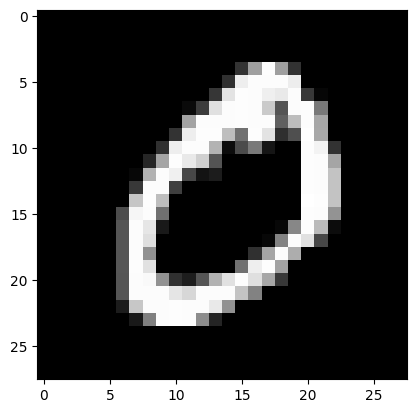

In [6]:
plt.imshow(x_train[1],cmap='gray')

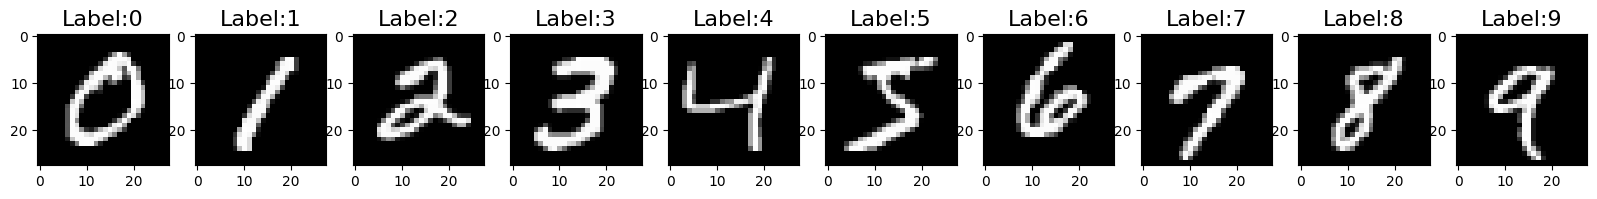

In [7]:
num_classes =10
f,ax=plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
    sample = x_train[y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label:{}".format(i),fontsize=16)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [10]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
for i in range(10):
    print(y_train[i])
y_train.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


(60000, 10)

In [12]:
x_train = x_train/255
x_test= x_test/255
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [14]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7310 - accuracy: 0.7483
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2789 - accuracy: 0.9197
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9405
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1704 - accuracy: 0.9500
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1456 - accuracy: 0.9568
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1262 - accuracy: 0.9631
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1126 - accuracy: 0.9666
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1013 - accuracy: 0.9703
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0949 - accuracy: 0.9718
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0956 - accuracy: 0.9749


[0.09560797363519669, 0.9749000072479248]

In [21]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
np.argmax(prediction[0])

7

In [23]:
model.save('hwd_model.h5')